# WeatherPy
----

#### Analysis
* Observation #1. From the city latitude vs. maximum temperature plot, we see a gradual increase in maximum temperatures as we move towards the equator. Observing the same plot but focusing on the Northern and Southern hemispheres seperately, we see that temperatures increase more steeply when approaching the equator from the Southern Hemisphere than they do when approaching from the Northern Hemisphere. This is due to the fact that, when this data was collected, in August 2020, the Northern Hemisphere was experiencing its annual Summer. If the data were to have been collected between November and February, the opposite observation would likely be made.
* Observations #2-4. Observing the data for humidity, cloudiness, and wind speed, there does not appear to be a significant coorelation with latitude values. This can be verified via the fact that the absolute value of the coorelation coeficients between these values and city latitude never exceeded 0.20. Each of these lack coorelation with city latitude because they are controlled by more local and regional weather patterns, as opposed to global positioning. Of course, some areas, such as the Pacific Northwest, are more likely to experience cloudiness than the Southwestern United States. However, on any particular day, there is not a sufficiently significant coorelation that would allow for the prediction of a city's humidity, cloudiness, or wind speed, knowing only its latitude.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Set up lists to hold reponse info
valid_cities = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_count = 1
city_total_count = len(cities)

#Create a for-loop to cycle through each city in the list of cities
for city in cities:
    try:
        #Append relevant weather data to reponse lists
        response = requests.get(query_url + city).json()
        valid_cities.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        #Print the city number and name
        print(f'Processing Record {city_count} of {city_total_count} | {city}')
        city_count = city_count + 1
    except:
        #If the city is not found, return an appropriate message
        print("City not found.")
        pass
print("API Call Complete")

Processing Record 1 of 608 | kikwit
Processing Record 2 of 608 | guilin
Processing Record 3 of 608 | hobart
Processing Record 4 of 608 | albany
Processing Record 5 of 608 | naze
Processing Record 6 of 608 | falam
Processing Record 7 of 608 | cape town
Processing Record 8 of 608 | bredasdorp
Processing Record 9 of 608 | bengkulu
Processing Record 10 of 608 | alofi
Processing Record 11 of 608 | vila franca do campo
Processing Record 12 of 608 | hithadhoo
Processing Record 13 of 608 | palasa
Processing Record 14 of 608 | carnarvon
Processing Record 15 of 608 | rikitea
Processing Record 16 of 608 | puerto cabezas
Processing Record 17 of 608 | castro
Processing Record 18 of 608 | provideniya
Processing Record 19 of 608 | busselton
Processing Record 20 of 608 | ushuaia
Processing Record 21 of 608 | grindavik
Processing Record 22 of 608 | saskylakh
Processing Record 23 of 608 | codrington
City not found.
Processing Record 24 of 608 | mahibadhoo
Processing Record 25 of 608 | mocuba
Processing 

Processing Record 201 of 608 | talnakh
Processing Record 202 of 608 | minggang
Processing Record 203 of 608 | qaanaaq
Processing Record 204 of 608 | lavrentiya
Processing Record 205 of 608 | san joaquin
Processing Record 206 of 608 | cidreira
Processing Record 207 of 608 | bonthe
Processing Record 208 of 608 | ontario
Processing Record 209 of 608 | san policarpo
Processing Record 210 of 608 | mahe
Processing Record 211 of 608 | katangli
City not found.
Processing Record 212 of 608 | lebu
Processing Record 213 of 608 | padang
Processing Record 214 of 608 | barra patuca
City not found.
Processing Record 215 of 608 | joacaba
Processing Record 216 of 608 | sisimiut
Processing Record 217 of 608 | sinnamary
Processing Record 218 of 608 | laem sing
Processing Record 219 of 608 | turmalina
Processing Record 220 of 608 | westport
Processing Record 221 of 608 | omboue
Processing Record 222 of 608 | portree
Processing Record 223 of 608 | sao filipe
Processing Record 224 of 608 | san patricio
Proc

Processing Record 399 of 608 | phan thiet
Processing Record 400 of 608 | rio gallegos
Processing Record 401 of 608 | ponta do sol
Processing Record 402 of 608 | arkhipovka
Processing Record 403 of 608 | nizwa
Processing Record 404 of 608 | jacobina
Processing Record 405 of 608 | olinda
Processing Record 406 of 608 | narsaq
Processing Record 407 of 608 | koudougou
Processing Record 408 of 608 | santa cruz
Processing Record 409 of 608 | auki
Processing Record 410 of 608 | nieuw amsterdam
City not found.
Processing Record 411 of 608 | cururupu
Processing Record 412 of 608 | tazovskiy
Processing Record 413 of 608 | gao
Processing Record 414 of 608 | mehamn
Processing Record 415 of 608 | husavik
Processing Record 416 of 608 | halifax
Processing Record 417 of 608 | zeerust
Processing Record 418 of 608 | constitucion
Processing Record 419 of 608 | gawler
Processing Record 420 of 608 | aksarka
City not found.
Processing Record 421 of 608 | svetlaya
Processing Record 422 of 608 | arroyo
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Use a dictionary to pull together the lists of weather data
weather_dict = {
    "City": valid_cities,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temperature": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Timestamp": date,
}

#Combine the lists into a single dataframe
weather_data = pd.DataFrame(weather_dict)

#Print to CSV file
weather_data.to_csv("Resources/weather_data.csv", index=False, header=True)

#Print weather_data dataframe
weather_data

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Timestamp
0,Kikwit,-5.04,18.82,74.84,85,100,0.67,CD,1598559844
1,Guilin,25.28,110.29,71.60,94,0,1.59,CN,1598559781
2,Hobart,-42.88,147.33,48.00,79,90,10.29,AU,1598559463
3,Albany,42.60,-73.97,64.99,95,100,4.79,US,1598559338
4,Naze,28.37,129.48,80.60,94,97,5.82,JP,1598559601
...,...,...,...,...,...,...,...,...,...
552,Sioux Lookout,50.10,-91.92,69.80,56,75,8.05,CA,1598559478
553,São João da Barra,-21.64,-41.05,75.20,73,75,9.17,BR,1598559764
554,Ferzikovo,54.52,36.76,57.20,93,53,2.24,RU,1598559914
555,Porto-Novo,6.50,2.60,78.80,83,20,11.41,BJ,1598559524


In [5]:
#Create a file path to recall the weather_data.csv file
weather_path = "Resources/weather_data.csv"

#Create a dataframe from the weather_data.csv file
weather_df = pd.read_csv(weather_path)

#Print weather_df dataframe
weather_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Timestamp
0,Kikwit,-5.04,18.82,74.84,85,100,0.67,CD,1598559844
1,Guilin,25.28,110.29,71.60,94,0,1.59,CN,1598559781
2,Hobart,-42.88,147.33,48.00,79,90,10.29,AU,1598559463
3,Albany,42.60,-73.97,64.99,95,100,4.79,US,1598559338
4,Naze,28.37,129.48,80.60,94,97,5.82,JP,1598559601


In [6]:
#Create a dictionary of statistical values for the quantitative columns of the weather_df dataframe
weather_stats_dictionary = {'Latitude': [weather_df['Latitude'].count(), weather_df['Latitude'].mean(), weather_df['Latitude'].std(), 
                  weather_df['Latitude'].min(), weather_df['Latitude'].quantile([.25])[.25], weather_df['Latitude'].median(), weather_df['Latitude'].quantile([.75])[.75], 
                  weather_df['Latitude'].max()],
                 'Longitude': [weather_df['Longitude'].count(), weather_df['Longitude'].mean(), weather_df['Longitude'].std(), 
                  weather_df['Longitude'].min(), weather_df['Longitude'].quantile([.25])[.25], weather_df['Longitude'].median(), weather_df['Longitude'].quantile([.75])[.75],
                  weather_df['Longitude'].max()],
                 'Max Temperature': [weather_df['Max Temperature'].count(), weather_df['Max Temperature'].mean(), weather_df['Max Temperature'].std(), 
                  weather_df['Max Temperature'].min(), weather_df['Max Temperature'].quantile([.25])[.25], weather_df['Max Temperature'].median(), weather_df['Max Temperature'].quantile([.75])[.75], 
                  weather_df['Max Temperature'].max()],
                 'Humidity': [weather_df['Humidity'].count(), weather_df['Humidity'].mean(), weather_df['Humidity'].std(), 
                  weather_df['Humidity'].min(), weather_df['Humidity'].quantile([.25])[.25], weather_df['Humidity'].median(), weather_df['Humidity'].quantile([.75])[.75], 
                  weather_df['Humidity'].max()],
                 'Cloudiness': [weather_df['Cloudiness'].count(), weather_df['Cloudiness'].mean(), weather_df['Cloudiness'].std(), 
                  weather_df['Cloudiness'].min(), weather_df['Cloudiness'].quantile([.25])[.25], weather_df['Cloudiness'].median(), weather_df['Cloudiness'].quantile([.75])[.75],
                  weather_df['Cloudiness'].max()],
                 'Wind Speed': [weather_df['Wind Speed'].count(), weather_df['Wind Speed'].mean(), weather_df['Wind Speed'].std(), 
                  weather_df['Wind Speed'].min(), weather_df['Wind Speed'].quantile([.25])[.25], weather_df['Wind Speed'].median(), weather_df['Wind Speed'].quantile([.75])[.75],
                  weather_df['Wind Speed'].max()],
                }

#Convert the weather_stats_dictionary into a dataframe
weather_statistical_summary = pd.DataFrame(weather_stats_dictionary)

#Change the index labels of the dataframe and print
weather_statistical_summary.set_axis(['Count', 'Mean', 'Standard Deviation', 'Minimum', '25%', 'Median', '75%', 'Maximum'])

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
Count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
Mean,20.478797,20.868905,68.602567,72.328546,51.032316,7.710646
Standard Deviation,32.922450,89.067758,15.087398,20.384032,38.722203,5.165251
Minimum,-54.800000,-179.170000,29.660000,8.000000,0.000000,0.340000
25%,-6.660000,-55.430000,56.320000,62.000000,10.000000,4.000000
Median,23.230000,26.890000,70.000000,77.000000,50.000000,6.710000
75%,48.480000,100.350000,79.750000,87.000000,90.000000,10.290000
Maximum,78.220000,179.320000,104.680000,100.000000,100.000000,30.400000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#This step has been skipped because the maximum humidity value observed is 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

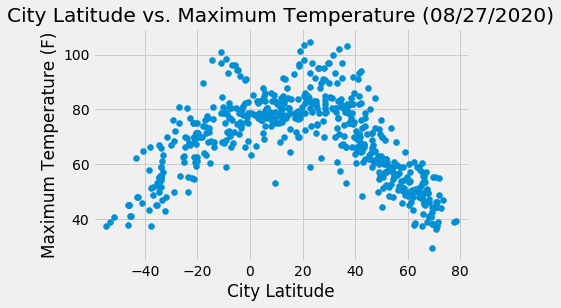

In [16]:
#Create a scatter plot with latitude on the x-axis and maximum temperature on the y-axis
plt.scatter(weather_df['Latitude'], weather_df['Max Temperature'])

#Format the scatter plot
plt.grid()
    #http://jonathansoma.com/lede/data-studio/matplotlib/adding-grid-lines-to-a-matplotlib-chart/
plt.title('City Latitude vs. Maximum Temperature (08/27/2020)')
plt.xlabel('City Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.xlim(weather_df['Latitude'].min()-5, weather_df['Latitude'].max()+5)
plt.ylim(weather_df['Max Temperature'].min()-5, weather_df['Max Temperature'].max()+5)
plt.grid()

#Save the figure
plt.savefig('Figures/latitude_vs_temperature.png')

## Latitude vs. Humidity Plot

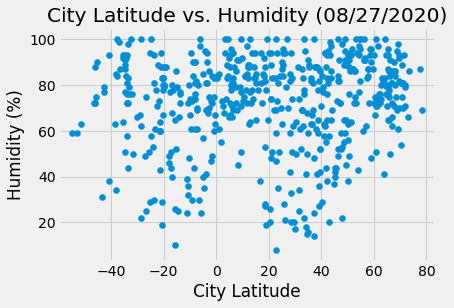

In [15]:
#Create a scatter plot with latitude on the x-axis and humidity on the y-axis
plt.scatter(weather_df['Latitude'], weather_df['Humidity'])

#Format the scatter plot
plt.grid()
plt.title('City Latitude vs. Humidity (08/27/2020)')
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.xlim(weather_df['Latitude'].min()-5, weather_df['Latitude'].max()+5)
plt.ylim(weather_df['Humidity'].min()-5, weather_df['Humidity'].max()+5)
plt.grid()

#Save the figure
plt.savefig('Figures/latitude_vs_humidity.png')

## Latitude vs. Cloudiness Plot

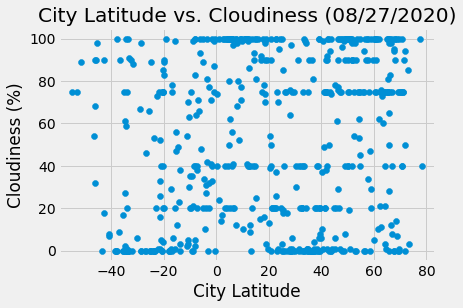

In [14]:
#Create a scatter plot with latitude on the x-axis and cloudiness on the y-axis
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness'])

#Format the scatter plot
plt.grid()
plt.title('City Latitude vs. Cloudiness (08/27/2020)')
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim(weather_df['Latitude'].min()-5, weather_df['Latitude'].max()+5)
plt.ylim(weather_df['Cloudiness'].min()-5, weather_df['Cloudiness'].max()+5)
plt.grid()

#Save the figure
plt.savefig('Figures/latitude_vs_cloudiness.png')

## Latitude vs. Wind Speed Plot

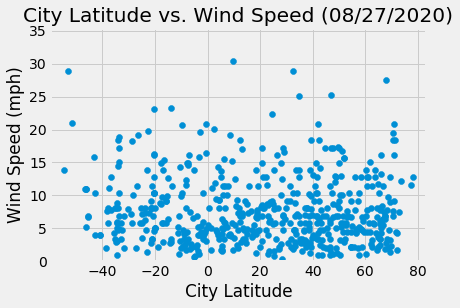

In [17]:
#Create a scatter plot with latitude on the x-axis and wind speed on the y-axis
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed'])

#Format the scatter plot
plt.grid()
plt.title('City Latitude vs. Wind Speed (08/27/2020)')
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlim(weather_df['Latitude'].min()-5, weather_df['Latitude'].max()+5)
plt.ylim(0, weather_df['Wind Speed'].max()+5)
plt.grid()

#Save the figure
plt.savefig('Figures/latitude_vs_wind_speed.png')

## Linear Regression

In [9]:
#Create seperate sub-dataframes of the weather_df dataframe for the north and south hemispheres
southern_weather_df = weather_df.loc[weather_df["Latitude"] <= 0, :]
northern_weather_df = weather_df.loc[weather_df["Latitude"] >= 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The coorelation coefficient between Max Temperature and Latitude in the Northern Hemisphere is -0.77
The line of best fit is y = -0.58x + 91.15


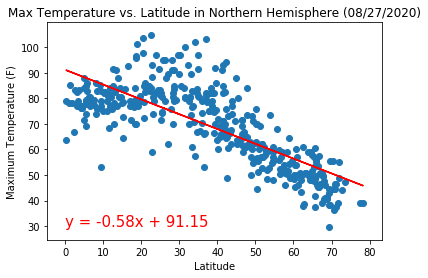

In [27]:
#Calculate and print the Pearson coorelation coefficient
print(f"The coorelation coefficient between Max Temperature and Latitude in the Northern Hemisphere is {round(st.pearsonr(northern_weather_df['Max Temperature'],northern_weather_df['Latitude'])[0],2)}")

#Create a linear regression equation and place the line of best fit on the scatter plot
x_values = northern_weather_df['Latitude']
y_values = northern_weather_df['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Format the scatterplot
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.title('Max Temperature vs. Latitude in Northern Hemisphere (08/27/2020)')
plt.xlim(northern_weather_df['Latitude'].min()-5, northern_weather_df['Latitude'].max()+5)
plt.ylim(northern_weather_df['Max Temperature'].min()-5, northern_weather_df['Max Temperature'].max()+5)

#Print the equation of the linear regression model
print(f"The line of best fit is {line_eq}")

#Print the scatterplot with the line of best fit superimposed on it
plt.annotate(line_eq,(0,30),fontsize=15,color="red")

#Save the figure
plt.savefig('Figures/north_temp_v_latitude.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The coorelation coefficient between Max Temperature and Latitude in the Southern Hemisphere is 0.8
The line of best fit is y = 0.83x + 84.76


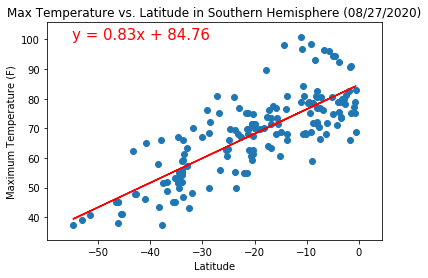

In [28]:
#Calculate and print the Pearson coorelation coefficient
print(f"The coorelation coefficient between Max Temperature and Latitude in the Southern Hemisphere is {round(st.pearsonr(southern_weather_df['Max Temperature'],southern_weather_df['Latitude'])[0],2)}")

#Create a linear regression equation and place the line of best fit on the scatter plot
x_values = southern_weather_df['Latitude']
y_values = southern_weather_df['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Format the scatterplot
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.title('Max Temperature vs. Latitude in Southern Hemisphere (08/27/2020)')
plt.xlim(southern_weather_df['Latitude'].min()-5, southern_weather_df['Latitude'].max()+5)
plt.ylim(southern_weather_df['Max Temperature'].min()-5, southern_weather_df['Max Temperature'].max()+5)

#Print the equation of the linear regression model
print(f"The line of best fit is {line_eq}")

#Print the scatterplot with the line of best fit superimposed on it
plt.annotate(line_eq,(-55,100),fontsize=15,color="red")

#Save the figure
plt.savefig('Figures/south_temp_v_latitude.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The coorelation coefficient between Humidity and Latitude in the Northern Hemisphere is 0.07
The line of best fit is y = 0.07x + 71.25


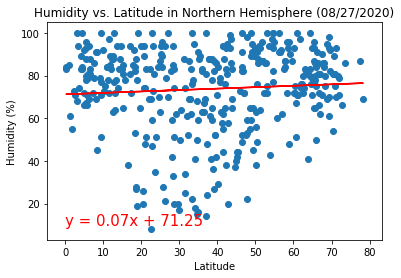

In [21]:
#Calculate and print the Pearson coorelation coefficient
print(f"The coorelation coefficient between Humidity and Latitude in the Northern Hemisphere is {round(st.pearsonr(northern_weather_df['Humidity'],northern_weather_df['Latitude'])[0],2)}")

#Create a linear regression equation and place the line of best fit on the scatter plot
x_values = northern_weather_df['Latitude']
y_values = northern_weather_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Format the scatterplot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs. Latitude in Northern Hemisphere (08/27/2020)')
plt.xlim(northern_weather_df['Latitude'].min()-5, northern_weather_df['Latitude'].max()+5)
plt.ylim(northern_weather_df['Humidity'].min()-5, northern_weather_df['Humidity'].max()+5)

#Print the equation of the linear regression model
print(f"The line of best fit is {line_eq}")

#Print the scatterplot with the line of best fit superimposed on it
plt.annotate(line_eq,(0,10),fontsize=15,color="red")

#Save the figure
plt.savefig('Figures/north_humidity_v_latitude.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The coorelation coefficient between Humidity and Latitude in the Southern Hemisphere is -0.11
The line of best fit is y = -0.17x + 65.35


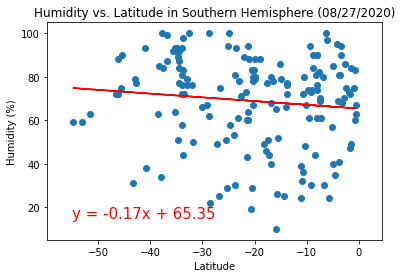

In [22]:
#Calculate and print the Pearson coorelation coefficient
print(f"The coorelation coefficient between Humidity and Latitude in the Southern Hemisphere is {round(st.pearsonr(southern_weather_df['Humidity'],southern_weather_df['Latitude'])[0],2)}")

#Create a linear regression equation and place the line of best fit on the scatter plot
x_values = southern_weather_df['Latitude']
y_values = southern_weather_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Format the scatterplot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs. Latitude in Southern Hemisphere (08/27/2020)')
plt.xlim(southern_weather_df['Latitude'].min()-5, southern_weather_df['Latitude'].max()+5)
plt.ylim(southern_weather_df['Humidity'].min()-5, southern_weather_df['Humidity'].max()+5)

#Print the equation of the linear regression model
print(f"The line of best fit is {line_eq}")

#Print the scatterplot with the line of best fit superimposed on it
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")

#Save the figure
plt.savefig('Figures/south_humidity_v_latitude.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The coorelation coefficient between Cloudiness and Latitude in the Northern Hemisphere is 0.01
The line of best fit is y = 0.02x + 55.07


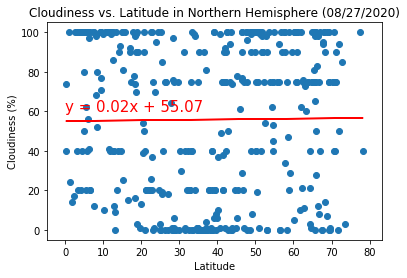

In [23]:
#Calculate and print the Pearson coorelation coefficient
print(f"The coorelation coefficient between Cloudiness and Latitude in the Northern Hemisphere is {round(st.pearsonr(northern_weather_df['Cloudiness'],northern_weather_df['Latitude'])[0],2)}")

#Create a linear regression equation and place the line of best fit on the scatter plot
x_values = northern_weather_df['Latitude']
y_values = northern_weather_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Format the scatterplot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs. Latitude in Northern Hemisphere (08/27/2020)')
plt.xlim(northern_weather_df['Latitude'].min()-5, northern_weather_df['Latitude'].max()+5)
plt.ylim(northern_weather_df['Cloudiness'].min()-5, northern_weather_df['Cloudiness'].max()+5)

#Print the equation of the linear regression model
print(f"The line of best fit is {line_eq}")

#Print the scatterplot with the line of best fit superimposed on it
plt.annotate(line_eq,(0,60),fontsize=15,color="red")

#Save the figure
plt.savefig('Figures/north_cloudiness_v_latitude.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The coorelation coefficient between Cloudiness and Latitude in the Southern Hemisphere is 0.08
The line of best fit is y = 0.23x + 44.7


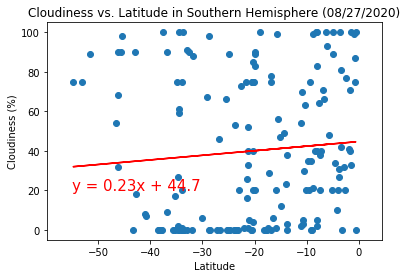

In [24]:
#Calculate and print the Pearson coorelation coefficient
print(f"The coorelation coefficient between Cloudiness and Latitude in the Southern Hemisphere is {round(st.pearsonr(southern_weather_df['Cloudiness'],southern_weather_df['Latitude'])[0],2)}")

#Create a linear regression equation and place the line of best fit on the scatter plot
x_values = southern_weather_df['Latitude']
y_values = southern_weather_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Format the scatterplot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs. Latitude in Southern Hemisphere (08/27/2020)')
plt.xlim(southern_weather_df['Latitude'].min()-5, southern_weather_df['Latitude'].max()+5)
plt.ylim(southern_weather_df['Cloudiness'].min()-5, southern_weather_df['Cloudiness'].max()+5)

#Print the equation of the linear regression model
print(f"The line of best fit is {line_eq}")

#Print the scatterplot with the line of best fit superimposed on it
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

#Save the figure
plt.savefig('Figures/south_cloudiness_v_latitude.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The coorelation coefficient between Wind Speed and Latitude in the Northern Hemisphere is 0.01
The line of best fit is y = 0.0x + 7.41


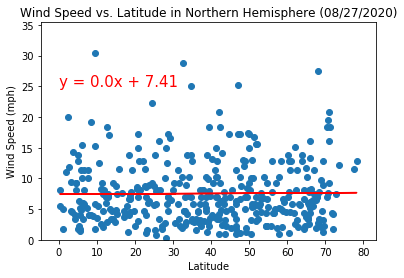

In [25]:
#Calculate and print the Pearson coorelation coefficient
print(f"The coorelation coefficient between Wind Speed and Latitude in the Northern Hemisphere is {round(st.pearsonr(northern_weather_df['Wind Speed'],northern_weather_df['Latitude'])[0],2)}")

#Create a linear regression equation and place the line of best fit on the scatter plot
x_values = northern_weather_df['Latitude']
y_values = northern_weather_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Format the scatterplot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed vs. Latitude in Northern Hemisphere (08/27/2020)')
plt.xlim(northern_weather_df['Latitude'].min()-5, northern_weather_df['Latitude'].max()+5)
plt.ylim(0, northern_weather_df['Wind Speed'].max()+5)

#Print the equation of the linear regression model
print(f"The line of best fit is {line_eq}")

#Print the scatterplot with the line of best fit superimposed on it
plt.annotate(line_eq,(0,25),fontsize=15,color="red")

#Save the figure
plt.savefig('Figures/north_wind_speed_v_latitude.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The coorelation coefficient between Wind Speed and Latitude in the Southern Hemisphere is -0.17
The line of best fit is y = -0.07x + 6.66


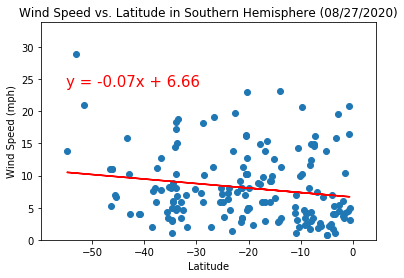

In [26]:
#Calculate and print the Pearson coorelation coefficient
print(f"The coorelation coefficient between Wind Speed and Latitude in the Southern Hemisphere is {round(st.pearsonr(southern_weather_df['Wind Speed'],southern_weather_df['Latitude'])[0],2)}")

#Create a linear regression equation and place the line of best fit on the scatter plot
x_values = southern_weather_df['Latitude']
y_values = southern_weather_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Format the scatterplot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed vs. Latitude in Southern Hemisphere (08/27/2020)')
plt.xlim(southern_weather_df['Latitude'].min()-5, southern_weather_df['Latitude'].max()+5)
plt.ylim(0, southern_weather_df['Wind Speed'].max()+5)

#Print the equation of the linear regression model
print(f"The line of best fit is {line_eq}")

#Print the scatterplot with the line of best fit superimposed on it
plt.annotate(line_eq,(-55,24),fontsize=15,color="red")

#Save the figure
plt.savefig('Figures/south_wind_speed_v_latitude.png')